Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)
library(tidyverse)

Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.6     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ───────────────

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))
split = initial_split(diabetes, strata = Outcome)
diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)
#tail(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 3, 8, 1, 13, 5, 10, 4, 7,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 126, 99, 97, 145,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 88, 84, 66, 82, 75, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 41, 0, 15, 19, 26, 31, 33…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 235, 0, 140, 110, 0, 0, 19…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 27, 50, 22, 57, 60, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:The variable-outcome is suitable as the "outcome" because the values are "1" or "0".**

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |   Plasma glucose concentration a 2 hours in an oral glucose tolerance test.|
| BMI         |   Body mass index (weight in kg/(height in m)^2).|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

In [4]:
Outcome = diabetes_train |> select(Outcome)
frequency_table <- table(Outcome)
print(frequency_table)

Outcome
  0   1 
375 201 


Warning message in geom_bar(mapping = aes(x = Outcome, fill = Outcome, position = "identity")):
“Ignoring unknown aesthetics: position”


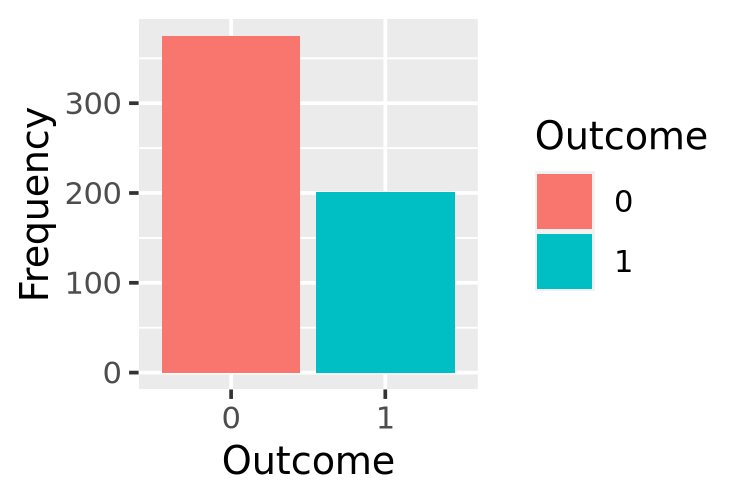

In [5]:
options(repr.plot.width = 3 , repr.plot.height = 2)
ggplot(diabetes_train) + 
  geom_bar(mapping = aes(x = Outcome, fill = Outcome, position = "identity")) +
  labs(x = "Outcome", y = "Frequency")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:  No, we have more "Outcomes" with zero.**

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))
plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

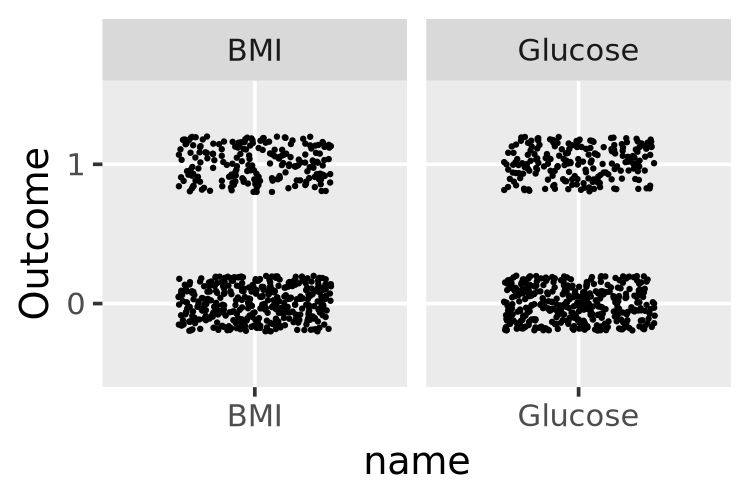

In [7]:
ggplot(plot_df, aes( x = name, y = Outcome)) +
geom_point(size = 0.2, position = position_jitter(width = 0.3, height = 0.2)) +
facet_wrap(~name, ncol = 2, scales = 'free_x')

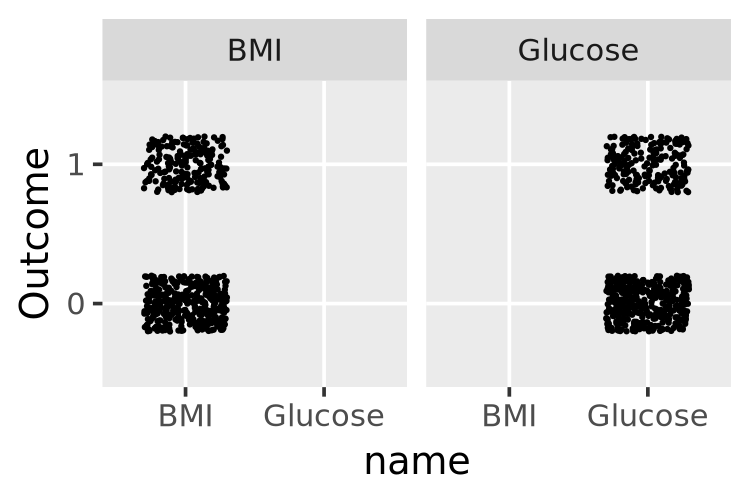

In [8]:
ggplot(plot_df, aes( x = name, y = Outcome)) +
geom_point(size = 0.2, position = position_jitter(width = 0.3, height = 0.2)) +
facet_wrap(~name, ncol = 2)


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer: When "scales = free_x" is removed, the BMI and Glucose shows up both panels. There are no plots for Glucose in the first panel and there are no plots for BMI in the second panel - for this dataset, I think it is more intuitive when there is just one variable for each panel on the x-axis.**

In [9]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.52577534,0.71138808,-10.579001,3.729123e-26
BMI,0.07060645,0.01573036,4.488546,7.171092e-06
Glucose,0.03661913,0.00388897,9.416151,4.679258e-21


Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [10]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.36954168,0.6304583,0,137,40,35,168,43.1,2.288,33,1
0,0.92277650,0.0772235,3,78,50,32,88,31.0,0.248,26,1
1,0.21260673,0.7873933,10,168,74,0,0,38.0,0.537,34,1
0,0.66746585,0.3325341,1,103,30,38,83,43.3,0.183,33,0
0,0.70507689,0.2949231,1,115,70,30,96,34.6,0.529,32,1
1,0.07858635,0.9214136,7,196,90,0,0,39.8,0.451,41,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [11]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 114  30
         1  11  37

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer: ~ 67 individuals had diabetes in my test data.
          ~ 43 people were predicted by to have diabetes by my model.
          ~ 18 people predicted to have diabetes, did not have it.**